# Monte Carlo Simulations

The Monte Carlo simulations are diferent methods to perform numerical calculation, better to be understood as "experimental" calculations.

The name "Monte Carlo" where first used by Nicholas Metropolis, John von Neumannn and Stanislav Ulman when they where working in the Manhatan project at Los Alamos during World War II.

The idea behind this method is that knowing some properties of a sistem, lets say statistical properties, we can use them to make predictions. How ever this predictions acuracy depend on the big numer theorems. So to have good prediction we need a suficiently big amount of numbers and the should be random.

# Using Probability to solve a problem
## Buffon's Needle

Lets imagin a plane surface with paralel lines, all separated by the same distance $D$, and lets imagin we drop a needle of length $L$ (Shorter than $D$). 
What is the probability of a needle crosing one line?

We know that the center of the needle can be between 0 and $D$, and that the angle the needle is forming with the lines is $\theta$ between 0 and $2\pi$.

Buffon showed that the probability of the needle intersecting one of the lines is $2D/\pi D$. By randombly tossing lots of needles on this surface we can count the number of crosings and stimate the probability by know the proportion of needles that crosses the lines, lets call it $f$. From here we can estimate the value of $\pi$ by the ecuation:

$$ \pi \approx \frac{2L}{fD}$$



In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

# Distance from line to line
D = 5
# Lenght of the needles
L = 3
# Number of random number
N = 100

# Center of the needles
centers = rand(N)*D
# Now we have to calculate the angle randomly

r = np.zeros(N)
yy = np.zeros(N)

# Just for ploting the distribution
x = []
xx = np.zeros(N)
y = []

for i in range(N):
    R = 2
    while R>1:
        X = rand()
        Y = rand()
        R =np.sqrt(X**2 + Y**2)
        # just for showing the chosing criteria
        if R > 1:
            x.append(X)
            y.append(Y)
    r[i] = R
    yy[i] = Y
    xx[i] = X

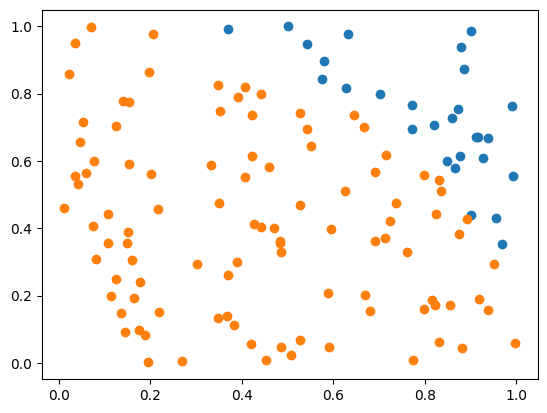

In [2]:

# we want to see the distribution of the posible angles
# In orange are the accepted angles, inside the circle,
plt.scatter(x,y)
plt.scatter(xx,yy)
plt.show()

In [3]:
# we want to know how manky steps where not used
len(x)

28

In [4]:
# Now we calculate the probability
deltay = (L/2)*yy/r

hits = (deltay>=centers) +(deltay>= D-centers)

f = np.mean(hits)
print('The probability is: '+str(f))
# Theroetical probability
Ptheo = (2*L)/(np.pi*D)
Pi_approx = (2*L)/(f*D)

print('The theoretical probability is: '+str(Ptheo))
print('Pi ='+str(Pi_approx))

The probability is: 0.41
The theoretical probability is: 0.38197186342054884
Pi =2.9268292682926833


In [5]:
Pi_approx

np.float64(2.9268292682926833)

We can see that our result is not really accuarate, we may ask the questions: How confident can we be in our result for a given number of trials? How many trials do we need to attain a specific level of confience in the result?

This example is good to identify the important parts of a Monte Carlo simulation.
1. Calculational model of the system of interest.
2. Data requiered by the model.
3. Simulation "Wrapper", this is the proces of looping through the model calculations, selecting different data values from the statistical distributions and recalculating the corresponding parameter of interest.

## Precision

An important part of the model is the determination of the precision associated with the result, or the degree of confidence we have in it. To do this we need many samples, or trials, in each of which we obtain an estimate of $\pi$.

One way of getting more estimates is simply to run the program many times, each with a different set of random numbers, recording the resulting estimate each time. For a program as small like this doing it does not represent a challenge, how ever with more elavorated simulation this may require very powerfull computers.



In [6]:
def Buffon_Monte_Carlo(N=1000):
    # Constants
    D = 5
    L = 3
    # Variables
    centers = rand(N)*D
    r = np.zeros(N)
    yy = np.zeros(N)
    # Monte Carlo loop
    for i in range(N):
        R = 2
        while R>1:
            X = rand()
            Y = rand()
            R =np.sqrt(X**2 + Y**2)
        r[i] = R
        yy[i] = Y
    # Now we calculate the probability
    deltay = (L/2)*yy/r
    hits = (deltay>=centers) +(deltay>= D-centers)
    f = np.mean(hits)
    Pi_approx = (2*L)/(f*D)
    return(Pi_approx)

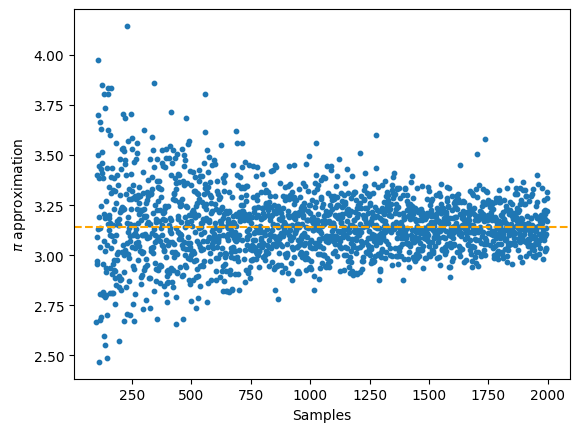

In [7]:
# Showing presition depending on number of needles
results = []
pi_approx = []
i = 100
while i < 2000:
    results.append(i)
    pi_approx.append(Buffon_Monte_Carlo(i))
    i+=1

plt.scatter(results,pi_approx,s=10)
plt.axhline(y=3.1416, linestyle='--',color = 'orange')
plt.xlabel('Samples')
plt.ylabel(r"$\pi$ approximation")
plt.show()

Here we can se that we reach, so to speak, a "normal" presition very fast. Practically there is no diference between 1000 and 2000 iterations. So is necesary to explore a more statistical way to refine the presition. What we will do now is to run the program two tousend times, each time we will do one tousend iterations.

## Samples and Runs

Samples are the number of "Monte-Carlo" loops or steps we will require our program to run, we can se that we are limited by the amount of oprations our program need to run and the memory of the computer we are using.

A run is literally to "run" the Monte-Carlo simulation program. With each run we can get a result. We can statistically make an estimation using the results of several runs.

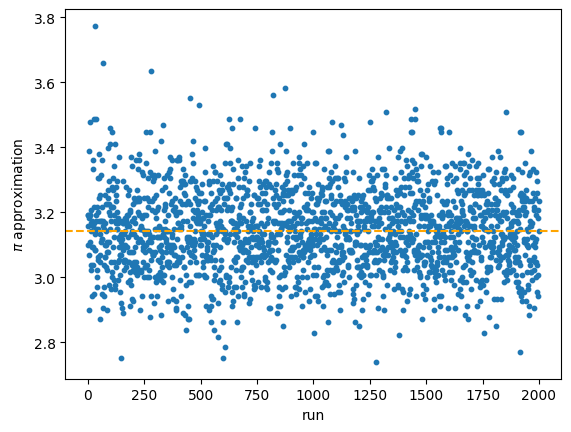

In [8]:
# Showing presition for 2000 runs
results = []
pi_approx = []
for i in range(2000):
    results.append(i)
    pi_approx.append(Buffon_Monte_Carlo(1000))

plt.scatter(results,pi_approx,s=10)
plt.axhline(y=3.1416, linestyle='--',color = 'orange')
plt.xlabel('run')
plt.ylabel(r"$\pi$ approximation")
plt.show()

Now we can generate an histogram of this results to better understand what is happning here. We can se that the distribution of the results looks roughly normal. We should use the overal mean, $\mu$, standar deviation, $\sigma$, and standard error, $se$ from the runs average estimate of $\pi$.

Central limit theorem:
In probability theory, the central limit theorem (CLT) states that, under appropriate conditions, the distribution of a normalized version of the sample mean converges to a standard normal distribution. This holds even if the original variables themselves are not normally distributed. There are several versions of the CLT, each applying in the context of different conditions.

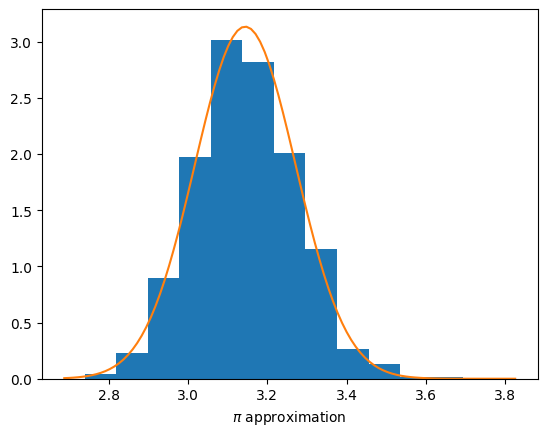

mean =3.144346624928986  Standar deviation =0.1273139275057906


In [9]:
import scipy.stats as stats

plt.hist(pi_approx, bins=13, density=True)
plt.xlabel(r"$\pi$ approximation")

#Mean and stnd_dev
mean = np.mean(pi_approx)
stnd_dv = np.std(pi_approx)

xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x,mean,stnd_dv)
plt.plot(x,p)
plt.show()

print('mean ='+str(mean)+'  Standar deviation ='+str(stnd_dv))

### Task 1
Picture $n$ bins and $n$ balls. Construct a Monte-Carlo simulation program that randomly scatters the $n$ balls into the bins. 
- Count the number of bins that don't contain any balls, $n_0$.
- Plot the ratio $n/n_0$ as a function of $n$
- To what constant does the ratio seem to be trying for?

# Using Random Numbers to Solve Integrals

We see in the previews example that using random numbers we can plot dots until we fill the area on a square, we can try to use this property to solve an integral by relating the ratio of points below and above the function we want to integrate and the area of the numbers we are sampling. (Lets remember we must know this area for the model to work)

First lets try to know the area covered by the $\sin x$, from 0 to $\pi$.

If we randomly put points in the rectangular area from 0 to $\pi$ in the $x$ axis and from 0 to 1 in the $y$ axis we have a rectangle of area $\pi$. Then the area unther the curve sould be estimated:

$$A = \frac{\text{points inside}}{\text{total points}} \times \pi $$


In [20]:
# Lets define the function we want to integrate
N = 1000

x_in = []
x_out = []
y_in = []
y_out = []

i = 0
while i < N:
    x_temp = rand()*np.pi
    y_temp = rand()
    if y_temp <= np.sin(x_temp):
        y_in.append(y_temp)
        x_in.append(x_temp)
        i += 1
    else:
        x_out.append(x_temp)
        y_out.append(y_temp)

(len(y_in)/(len(x_in)+len(x_out)))*np.pi

2.0333933032943645

This guives us an estimation of the area under the curve

$$ \int_0^\pi \sin(x) d x \approx A$$

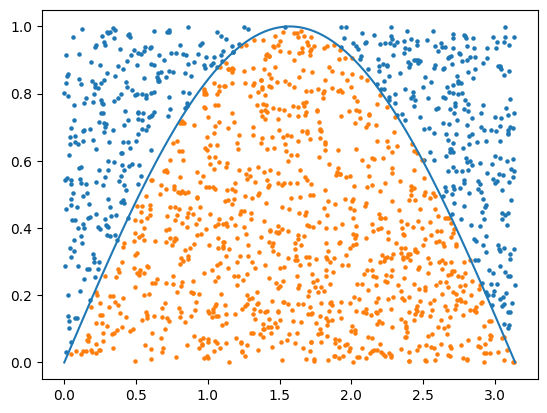

In [26]:
# We can take a graphical look about what is happening
# Lets plot the function
x = np.linspace(0,np.pi,100)
y = np.sin(x)

plt.plot(x,y)

# Lets plot the points
plt.scatter(x_out,y_out,s=5)
plt.scatter(x_in,y_in,s=5)
plt.show()

Now lets try to use our new super powers to solve more difficult situations.
Consider the function:

$$ f(x) = x^2 \sin(18x) + \pi x$$

Maybe this is a matematically simple integration to do, but graphycally we can se what the montecarlo will do with it.
Lets define the function and see what we are dealing with:

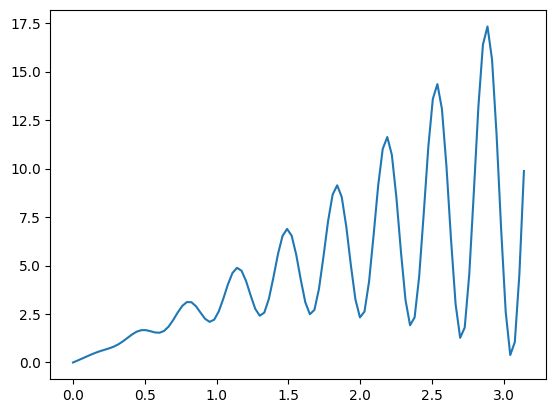

In [55]:
# Lets plot the function
def fu (x):
    y = (x**2)*np.sin(18*x)+np.pi*x
    return y
x = np.linspace(0,np.pi,100)
y = fu(x)

plt.plot(x,y)
plt.show()

Then the integral we will try to solve will be:
$$ \int_0^\pi x^2 \sin(18x) + \pi x d x = \frac{1}{18}\pi^2 (9 \pi -1) \approx 14.955$$

Now lets apply the same idea and verify if we need to do some changes:

In [112]:
N = 10000

x_in = []
x_out = []
y_in = []
y_out = []

i = 0
while i < N:
    x_temp = rand()*np.pi
    y_temp = rand()*18
    if y_temp <= fu(x_temp):
        y_in.append(y_temp)
        x_in.append(x_temp)
        i += 1
    else:
        x_out.append(x_temp)
        y_out.append(y_temp)

(len(y_in)/(len(x_in)+len(x_out)))*(np.pi*18)

14.913409927901334

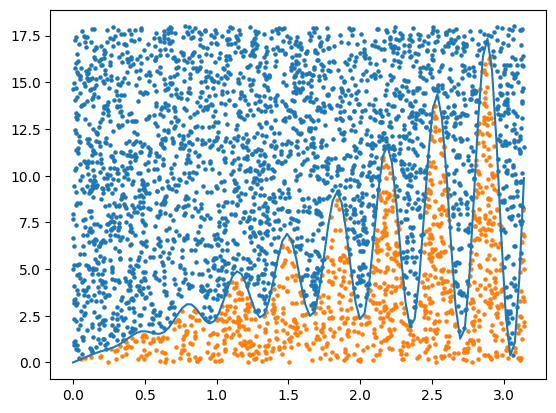

In [54]:
# Lets plot the points
plt.plot(x,y)
plt.scatter(x_out,y_out,s=5)
plt.scatter(x_in,y_in,s=5)
plt.show()

We can se clearly that we are generating way more points than we need, in this case is not relevant but with more complex problems we will need to be resourscefull and be efficient.

Lets learn how to make random numbers in a pattern:

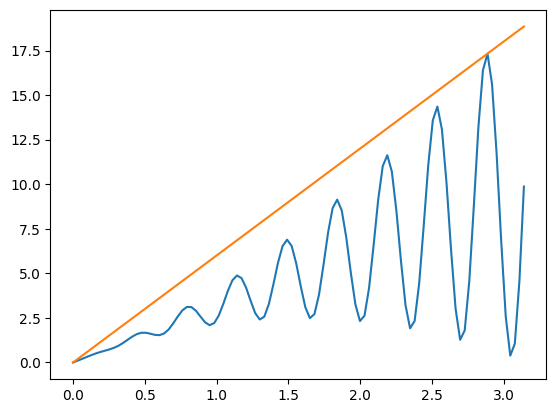

In [83]:
# Definition of a function to get random numbers
def m (x):
    y = (18/3)*x
    return y

z = m(x)

plt.plot(x,y)
plt.plot(x,z)

In [84]:
# now for each pair of numbers we will have to generate:
def Random_slope():
    """
    This func return a pair of random numbers below the slope
    """
    x_temp = rand()*np.pi
    y_temp = rand()*m(x_temp)
    return x_temp, y_temp

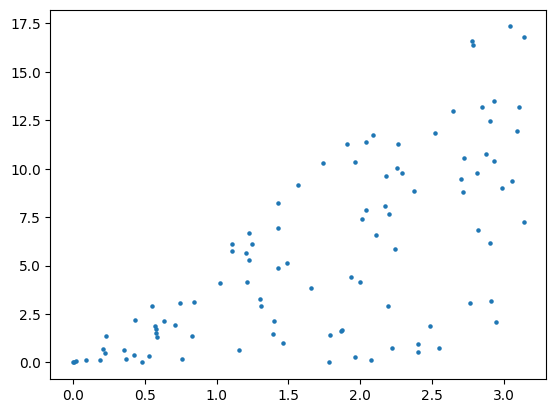

In [85]:
x_rand = []
y_rand = []
for i in range(100):
    xt,yt = Random_slope()
    x_rand.append(xt)
    y_rand.append(yt)

plt.scatter(x_rand,y_rand,s=5)
    

In [113]:
N = 5000

x_in = []
x_out = []
y_in = []
y_out = []

i = 0
while i < N:
    x_temp,y_temp = Random_slope()
    if y_temp <= fu(x_temp):
        y_in.append(y_temp)
        x_in.append(x_temp)
        i += 1
    else:
        x_out.append(x_temp)
        y_out.append(y_temp)

(len(y_in)/(len(x_in)+len(x_out)))*((18*np.pi)/2)

14.864017391603479

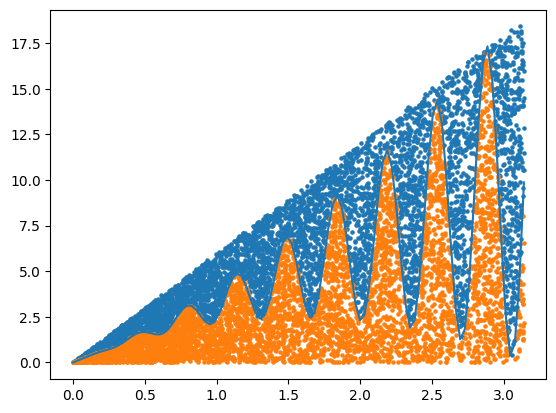

In [109]:
# Lets plot the points
plt.plot(x,y)
plt.scatter(x_out,y_out,s=5)
plt.scatter(x_in,y_in,s=5)
plt.show()